# Lab3 : Group 20 

## Part 1 - Creating and evaluating a random forest model

#### Importing libraries :

In [110]:
import pandas as pd
import numpy as np
import sklearn

#### Read in the data :

In [111]:
House_data = pd.read_csv("house_data.csv")
House_data.head(5)

,bedrooms,bathrooms,m2_living,floors,m2_above,m2_basement,m2_lot,view,quality,yr_built,renovated_last_5,city,statezip,price
0,3,1.50,124.0,1.5,124.0,0.0,735.0,0,3,1961,0,37,63,313000.0
1,5,2.50,339.0,2.0,313.0,26.0,841.0,4,5,1927,1,36,59,2384000.0
2,3,2.00,179.0,1.0,179.0,0.0,1110.0,0,4,1972,1,19,27,342000.0
3,3,2.25,186.0,1.0,93.0,93.0,746.0,0,4,1969,1,4,8,420000.0
4,4,2.50,180.0,1.0,106.0,74.0,975.0,0,4,1982,0,32,32,550000.0


#### Verify that all the data is numeric:

In [112]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          4600 non-null   int64  
 1   bathrooms         4600 non-null   float64
 2   m2_living         4600 non-null   float64
 3   floors            4600 non-null   float64
 4   m2_above          4600 non-null   float64
 5   m2_basement       4600 non-null   float64
 6   m2_lot            4600 non-null   float64
 7   view              4600 non-null   int64  
 8   quality           4600 non-null   int64  
 9   yr_built          4600 non-null   int64  
 10  renovated_last_5  4600 non-null   int64  
 11  city              4600 non-null   int64  
 12  statezip          4600 non-null   int64  
 13  price             4600 non-null   float64
dtypes: float64(7), int64(7)
memory usage: 503.2 KB


#### Verify that there are no missing values

In [4]:
House_data.isnull().sum()

bedrooms            0
bathrooms           0
m2_living           0
floors              0
m2_above            0
m2_basement         0
m2_lot              0
view                0
quality             0
yr_built            0
renovated_last_5    0
city                0
statezip            0
price               0
dtype: int64

#### Evalute model on training data using MAE

In [114]:
# Extract the appropriate feature vectors and target column for training data and validation data:

X,y = House_data.drop('price',axis = 1), House_data['price']

#To see how well the model fits the training data, we pass the feature vectors of the training data back into the model.

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X,y)

predictions= rf.predict(X)

from sklearn.metrics import mean_absolute_error

e = mean_absolute_error(y,predictions)
ep = e * 100.0/y.mean()

print(f"${e:.0f} average error ; {ep:.2f}% error")

$50238 average error ; 9.10% error


#### Split the data into training and validation sets

In [7]:
from sklearn.model_selection import train_test_split

# 20% of data goes into test set, 80% into training set

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 0.2)

#### Evalute model on validation data using MAE

In [8]:
# To see how well the model fits the validation data, we pass the feature vectors of the training data back into the model.

rf.fit(X_train,y_train)

predictions= rf.predict(X_test)

validation_e = mean_absolute_error(y_test,predictions)

validation_ep = validation_e * 100.0/y.mean()

print(f"${validation_e:.0f} average error ; {validation_ep:.2f}% error")

$132576 average error ; 24.02% error


- Comparing the difference between the 9.10% training error and the 24.02% validation error that comes to prediction accuracy reduced by 37.88%. 
- We can see the model performs well on the training data and we want our validation error to be close to training error as possible.


## Part 2 - Exploring the n_estimators hyper-parameter

In [ ]:
train1 = []
validation1 = []
# try n_estimators from 1 to 30
n = range(1, 31)

for value in n:
    # build the model
    rf = RandomForestRegressor(n_estimators = value, random_state=0)
    rf.fit(X_train,y_train)
    
    #Prediction for training and validation set
    prediction_training = rf.predict(X_train)
    prediction_validation = rf.predict(X_test)
    
    # MAE for training and validation set
    mae_training = mean_absolute_error(y_train,prediction_training)
    mae_training_ep = mae_training *100/y.mean()
    #train1[i]=round( mae_training,2)
    train1.append(mae_training)

    mae_validation = mean_absolute_error(y_test,prediction_validation)
    mae_validation_ep=  mae_validation * 100/y.mean()
    #validation1[i]=round( mae_validation,2)
    validation1.append(mae_validation)


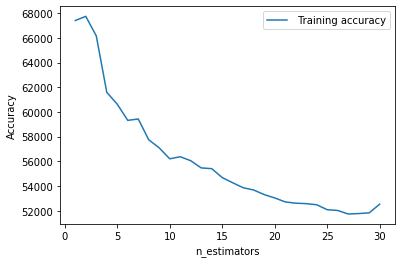

In [159]:
# Plotting for Training

import matplotlib.pyplot as plt

plt.plot(n,train1, label=" Training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

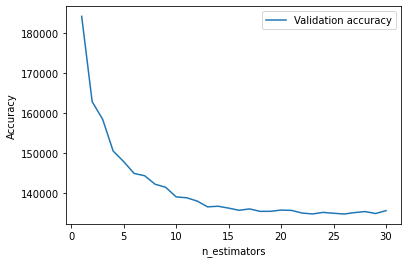

In [61]:
# Plotting for Validation

plt.plot(n,validation1, label ="Validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

#### Question 1: Which value of n_estimators gives the best results for the validation set?

In [173]:
index = validation1.index(min(validation1))
print('The index of minimum n_estimator :', index)

The index of minimum n_estimator : 25


- The best n_estimator value is 25 for the validation test.

#### Question 2: Explain how you decided that this value for n_estimators gave the best results;

- For a random forest model is it not an ideal case to choose more number of trees i.e n_estimators, as it increases the computational complexity.
- Hence, it is preferred to choose n_estimators for a random forest model having least MAE value.

#### Question 3: Why is the plot you created above not smooth?

- Since the validation error is not close to the training error we can see the plot is not smooth because of the difference.
- Also we expect the model to have some error and not fit well on the testing data due to the presence of both bias and variance.

#### Question 4:  Was the result here better than the result of Part 1? What % better or worse was it?

In [37]:
print(f"${mae_training:.0f} training average error : {mae_training_ep:.2f}% training error")
print(f"${mae_validation:.0f} validation average error : {mae_validation_ep:.2f}% validation error")

$52534 training average error : 9.52% training error
$135613 validation average error : 24.57% validation error


- The difference of ratio between both training and validation error in part 2 is around 38.74%.
- The prediction error was 37.88% in Part 1 thereby it can be observed that there is not much of a significant increase or decrease in the error.
- It is more or less having the same accuracy percentage.



## Part 3 - Exploring the max_features hyper-parameter

In [161]:
train2= []
validation2= []

v = range(1,14)

for i in v:
    rf=RandomForestRegressor(n_estimators=17,max_features=i)
    rf.fit(X_train,y_train)
      
    #Prediction for training and validation set
    prediction_training = rf.predict(X_train)
    prediction_validation = rf.predict(X_test)
    
    
    # MAE for training and validation set
    mae_training2 = mean_absolute_error(y_train,prediction_training)
    mae_training_ep2 = mae_training *100/y.mean()
    train2.append(mae_training2)
   
    
    mae_validation2 = mean_absolute_error(y_test,prediction_validation)
    mae_validation_ep2=  mae_validation * 100/y.mean()
    validation2.append(mae_validation2)
    

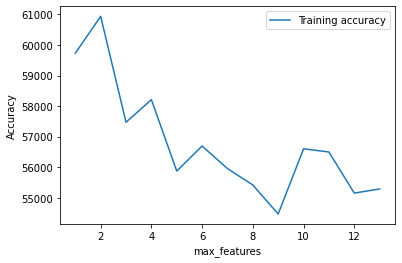

In [162]:
# Plotting for Training 
plt.plot(v,train2, label ="Training accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_features")
plt.legend()

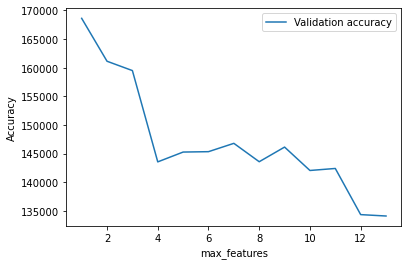

In [163]:
# Plotting for Validation 
plt.plot(v,validation2, label ="Validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_features")
plt.legend()

#### Question 1: Which value of max_features gives the best results for the validation set?

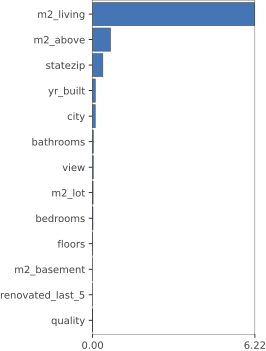

In [182]:
from rfpimp import *

I = importances(rf, X_test, y_test)
plot_importances(I, color='#4575b4', vscale=1.8)

- As per the plot above "m2_living" is the feature that gives the best result for validation set.

#### Question 2:  Explain how you decided that this value for max_features gave the best results;

- Selecting max_features helps to limit overfitting and increases the stability of the tree and also reduces variances.
- With the help of "rfpimp" package we are able to understand the feature that affectes validation set the most. We are able to check how well the model genralizes outside of the training set.

#### Question 3: Was the result here better than the result of Part 2? What % better or worse was it?

In [174]:
print(f"${mae_training2:.0f} training average error : {mae_training_ep2:.2f}% training error")
print(f"${mae_validation2:.0f} validation average error : {mae_validation_ep2:.2f}% validation error")

$55289 training average error : 10.47% training error
$134137 validation average error : 25.73% validation error


- The difference of ratio between both training and validation error in part 3 is around 40.69%.
- The prediction error was 38.74% in Part 2 thereby it can be observed that there is decrease in accuracy % in Part 3.
- The accuracy percentage has decrease by approximately 2 %.